In [3]:
!pwd
from Helper.Load.load import Base_Load
from Helper.Load.supervised import Supervised
from Helper.Load.regression import Regression
from Helper.Load.classification import Classification
from pandas.plotting import scatter_matrix, parallel_coordinates, andrews_curves
from Helper.Visual.Visual import Visual

import numpy as n
import matplotlib.pyplot as plt

/Users/jacob/Desktop/Project/MachineLearning/KEEL/Supervised/Standard/Haberman


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:935: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


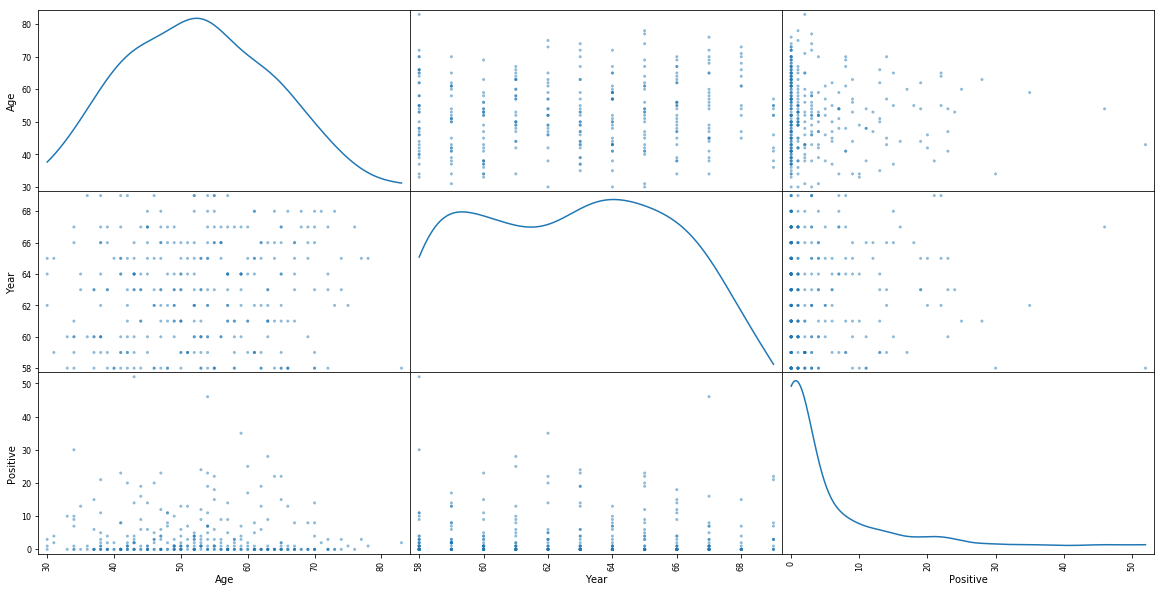

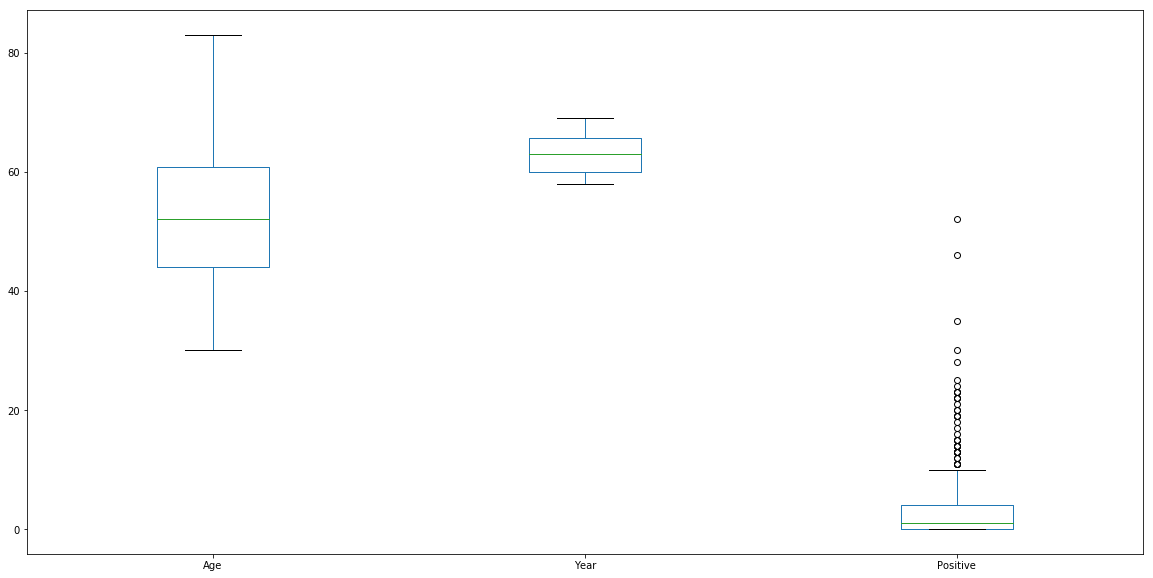

In [4]:
loadC = Classification("Data", "haberman.dat", "haberman-names.txt")

Visual(loadC)

In [5]:
n.array(loadC.attributes)

array([list(['@attribute', 'Age', 'integer', '[30,', '83]']),
       list(['@attribute', 'Year', 'integer', '[58,', '69]']),
       list(['@attribute', 'Positive', 'integer', '[0,', '52]']),
       list(['@attribute', 'Survival', '{positive,', 'negative}'])],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24a940b8>,
      dtype=object)

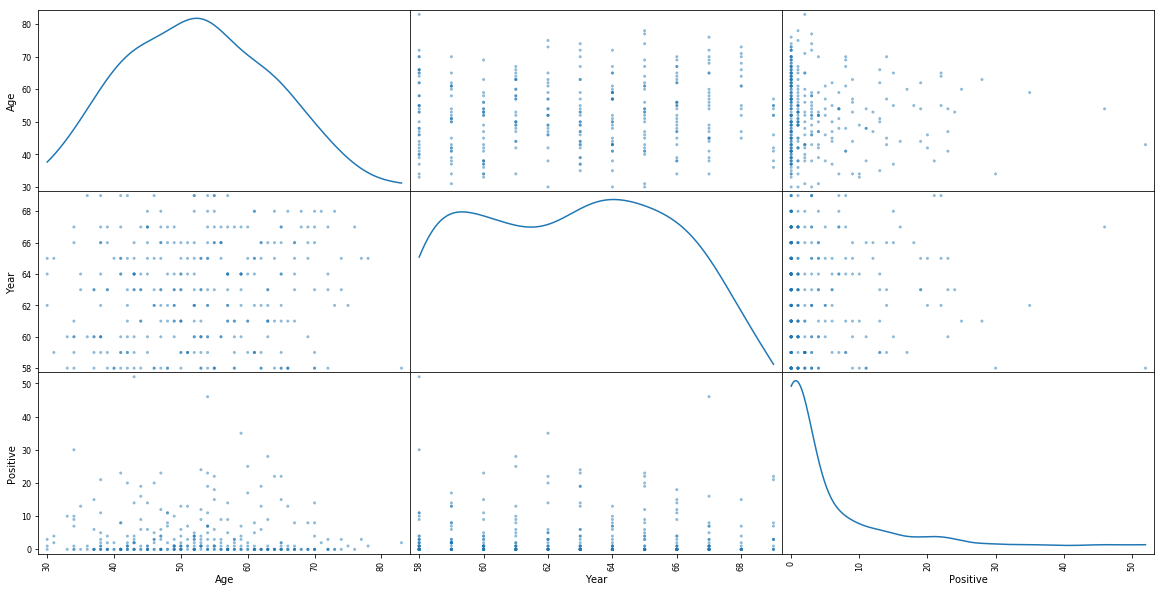

In [6]:
scatter_matrix(loadC.data()[loadC.inputs], diagonal='kde')

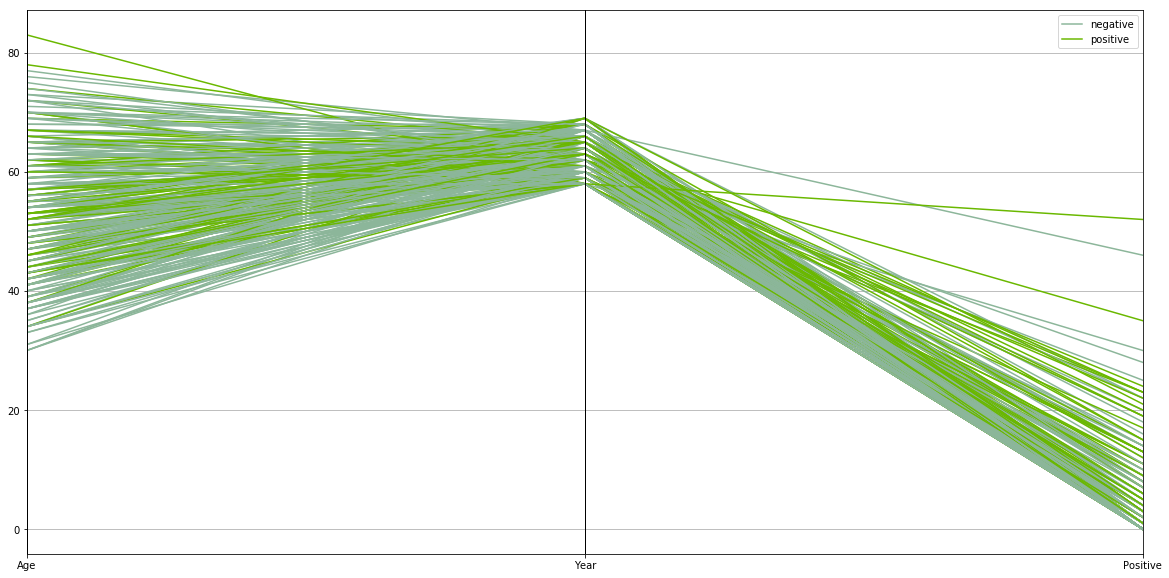

In [7]:
parallel_coordinates(loadC.data(),*loadC.outputs)

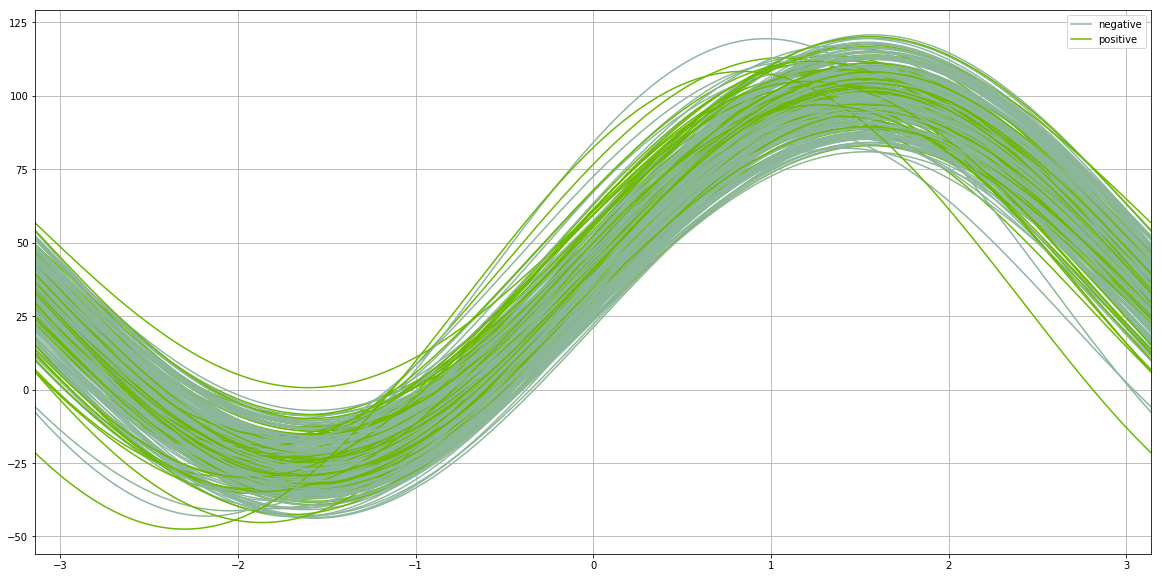

In [8]:
andrews_curves(loadC.data(),*loadC.outputs)